# Project 2- AQI of 50 Different Countries

In [20]:
# Setup dataframes for use

import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text      # For making text visible on graph
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.style.use('dark_background')

# Create dataframe
aqDF = pd.read_csv('AQICountries.csv')         

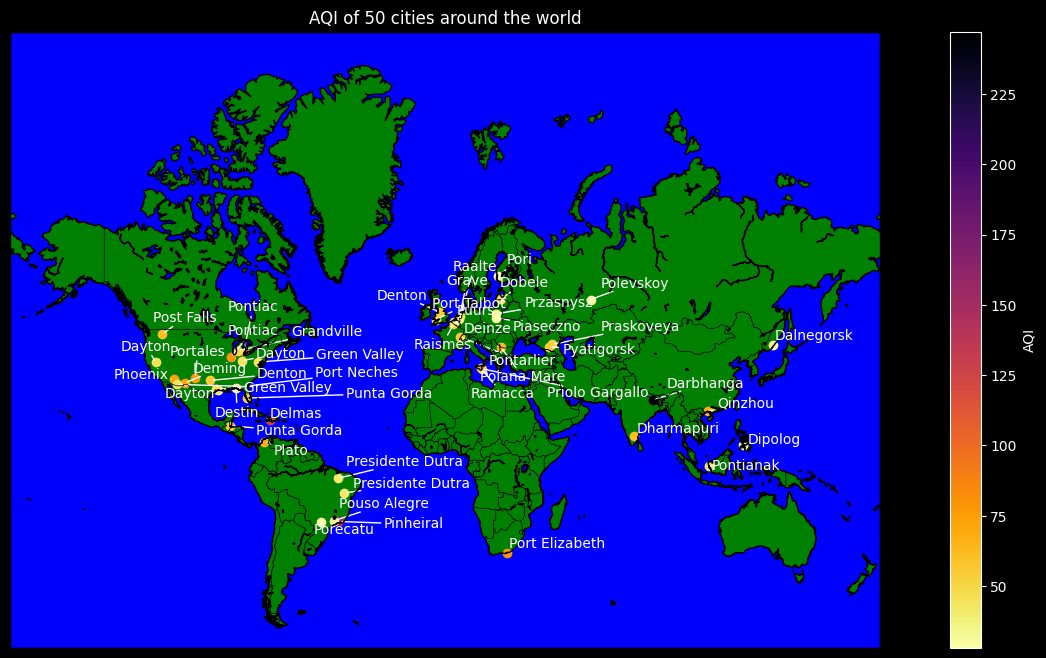

In [33]:
fig, ax = plt.subplots(figsize=(18, 8))
texts = [] 

# Create the Basemap
bMap = Basemap(projection='merc', 
            llcrnrlat=-60, urcrnrlat=85, 
            llcrnrlon=-180, urcrnrlon=180, 
            resolution='l', ax=ax)
bMap.drawcountries()
bMap.drawcoastlines()
bMap.drawmapboundary(fill_color='blue')
bMap.fillcontinents(color='green', lake_color='blue')

# Norm AQI values
norm = plt.Normalize(aqDF['AQI Value'].min(), aqDF['AQI Value'].max())
cmap = plt.get_cmap('inferno_r') 

# Plot each city
for index, row in aqDF.iterrows():
    lat = row['lat']
    lng = row['lng']
    city = row['City']
    aqiValue = row['AQI Value']
    
    x, y = bMap(lng, lat)
    color = cmap(norm(aqiValue))
    bMap.scatter(x, y, c=[color])
    texts.append(plt.text(x, y, city, fontsize=10, color='white'))

# Adjust text labels using adjustText
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='white'))

# Create a color bar
smap = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
smap.set_array([])
colorbar = plt.colorbar(smap, ax=ax)
colorbar.set_label('AQI')

plt.title('AQI of 50 cities around the world')
plt.show()